# Image processing for Code Segmentation


In [290]:
import os
from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

## Example image to be processed


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

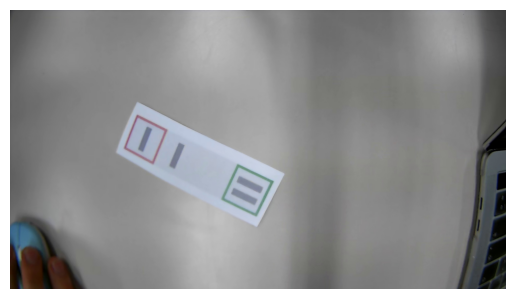

In [291]:
# Load the image
image = cv2.imread("1103_G1_14.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')


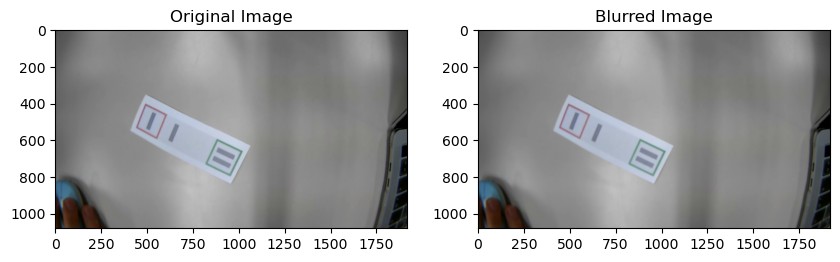

In [292]:
# Blur the image
image_blurred = cv2.GaussianBlur(image, (7,7), 0)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.title('Original Image'); plt.imshow(image)
plt.subplot(1, 2, 2); plt.title('Blurred Image'); plt.imshow(image_blurred)

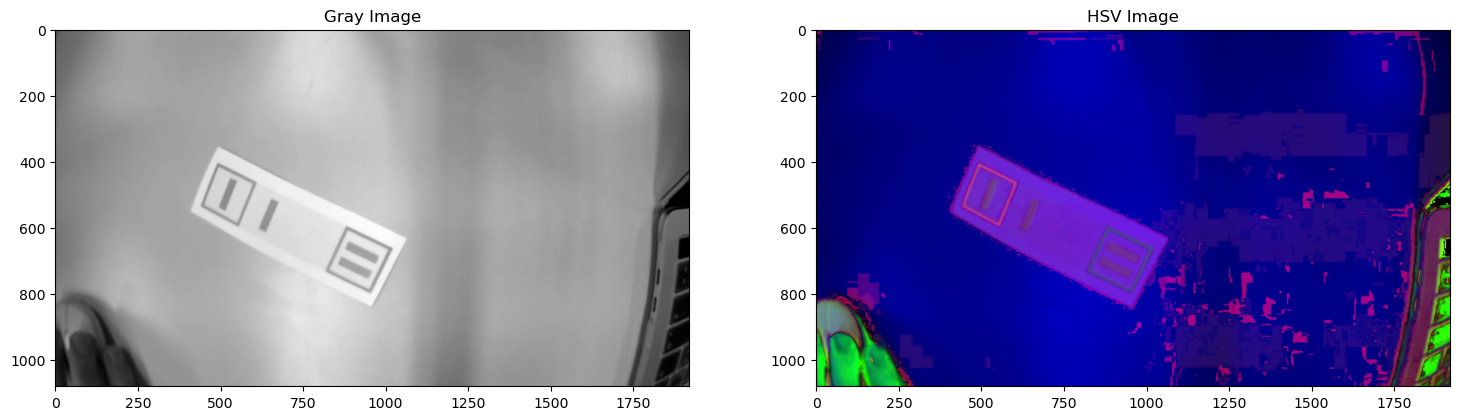

In [293]:
# Convert the image to grayscale and hsv
gray = cv2.cvtColor(image_blurred, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image_blurred, cv2.COLOR_RGB2HSV)

# Print images 
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1) ; plt.title('Gray Image') ; plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2) ; plt.title('HSV Image') ; plt.imshow(hsv)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

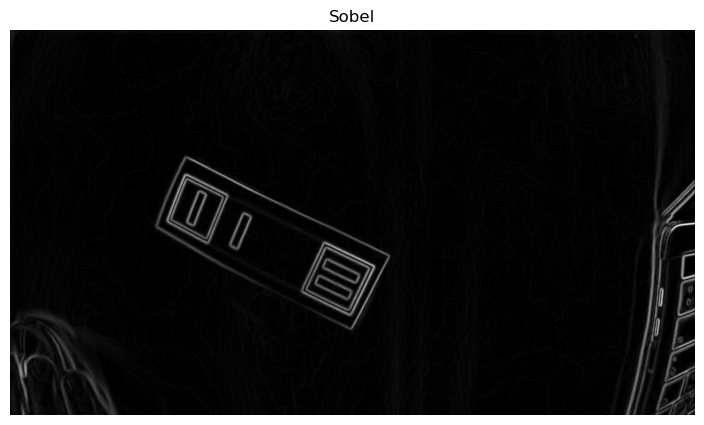

In [294]:
# Sobel filter the image.
## Apply the Sobel filter to the image. The Sobel filter is used to find the edges in an image.

img_rgb_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_rgb_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=11) 
img_rgb_sobel = np.sqrt(img_rgb_sobel_x**2 + img_rgb_sobel_y**2)
img_rgb_sobel = cv2.normalize(img_rgb_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the sobel image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_sobel, cmap='gray'), plt.title('Sobel') ; plt.axis('off')

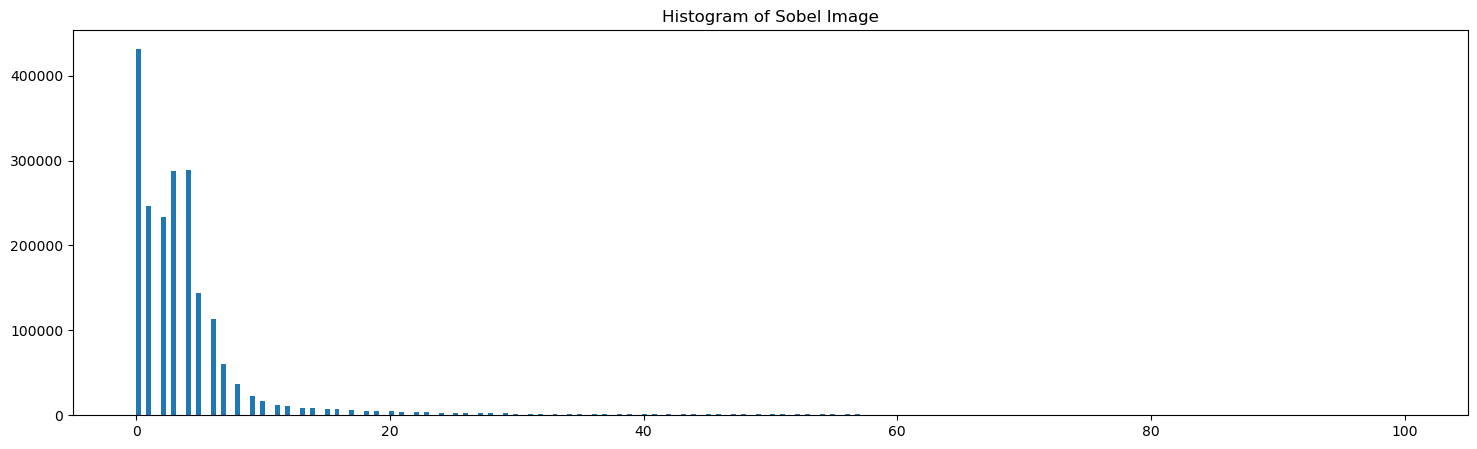

In [295]:
# Histogram of the sobel image
plt.figure(figsize=[18, 5])
plt.hist(img_rgb_sobel.ravel(), 256, [0, 100]) ; plt.title('Histogram of Sobel Image') ; plt.show()

(<matplotlib.image.AxesImage at 0x1d616779f10>, Text(0.5, 1.0, 'Threshold'))

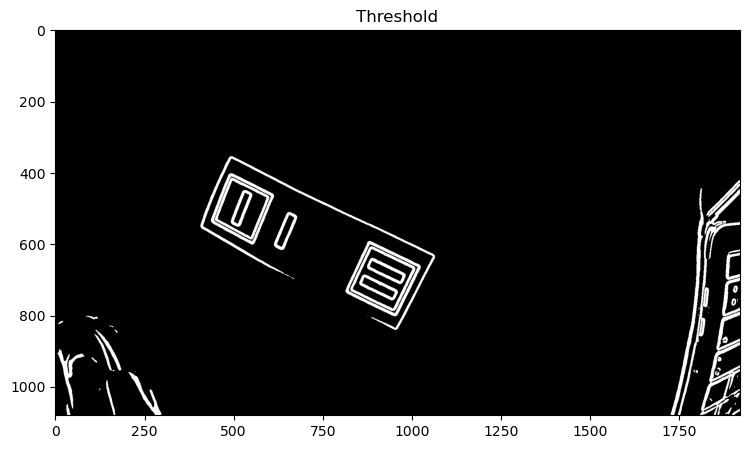

In [296]:
# Adaptative Threshold the image
## Threshold the image to create a binary image. This binary image will be used to create a mask.
# Adaptive threshold the image.
ret, img_rgb_thresh = cv2.threshold(img_rgb_sobel, 40, 255, cv2.THRESH_BINARY)

# Display the image with the adaptive threshold applied.
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_thresh, cmap='gray'), plt.title('Threshold')


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

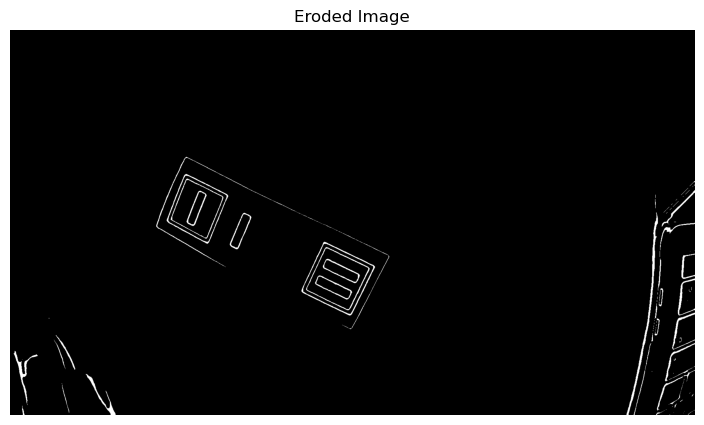

In [297]:
# Erode the image

kernel = np.ones((5,5), np.uint8)
img_rgb_erode = cv2.erode(img_rgb_thresh, kernel, iterations=1) 

# Display the eroded image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_erode, cmap='gray'), plt.title('Eroded Image') ; plt.axis('off')


Number of contours found =  181


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

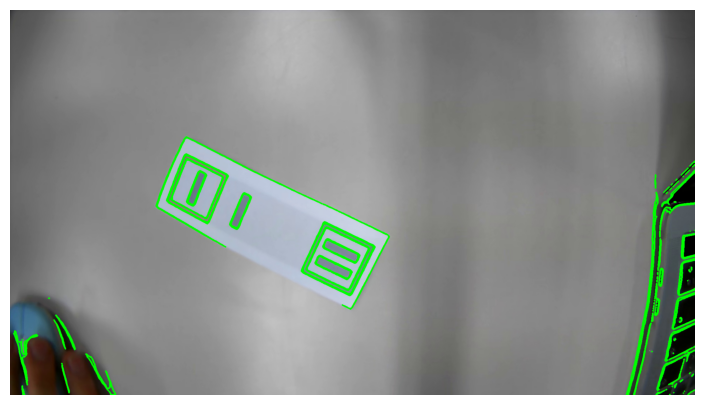

In [298]:
##Find the contours in the image

contours, hierarchy = cv2.findContours(img_rgb_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Number of contours
print('Number of contours found = ', len(contours))

# Draw the contours on the image
image_copy = np.copy(image)
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 3)

# Display the image with the contours
plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')


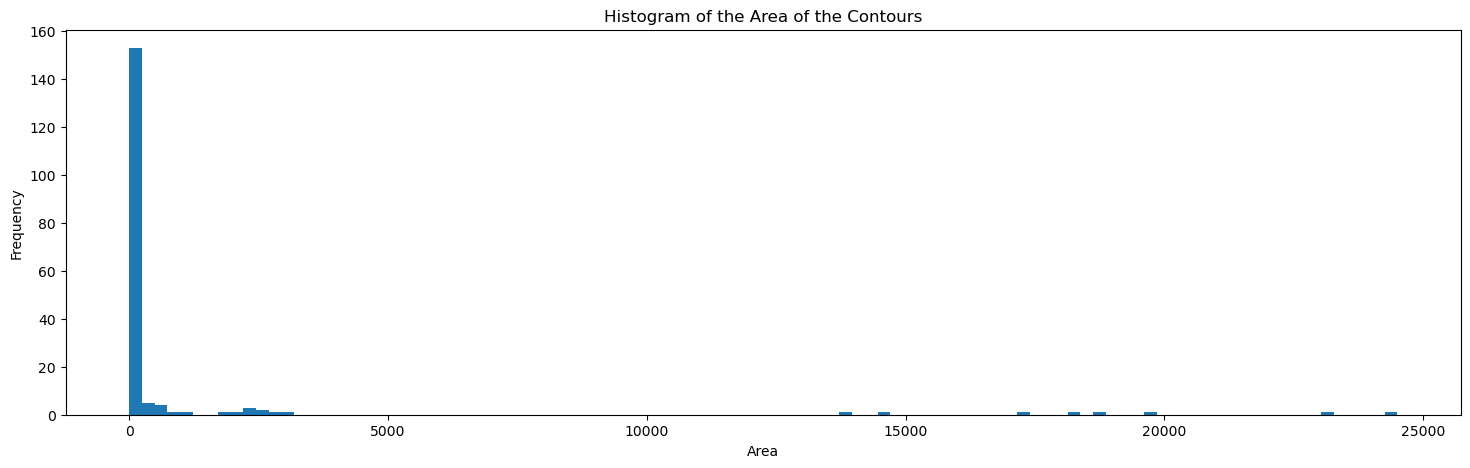

In [299]:
# Histogram of the area of the contours
areas = []
for contour in contours:
    area = cv2.contourArea(contour)
    areas.append(area)

plt.figure(figsize=[18, 5])
plt.hist(areas, bins=100) ; plt.title('Histogram of the Area of the Contours')
plt.xlabel('Area') ; plt.ylabel('Frequency'); plt.show()


Number of filtered contours =  14


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

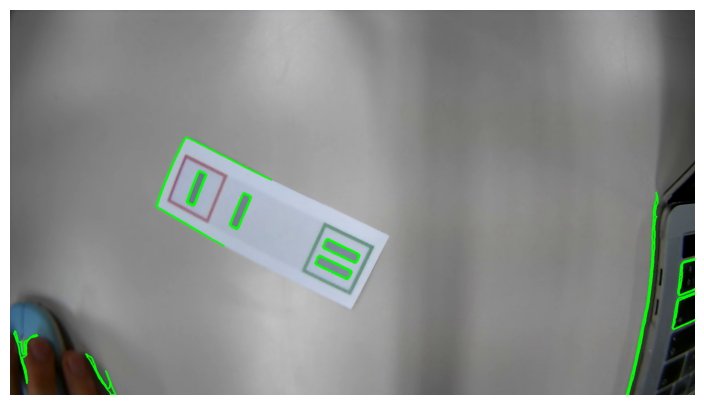

In [300]:
# Filter the contours by area
filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500 and area < 5000:
        filtered_contours.append(contour)

# Number of filtered contours
print('Number of filtered contours = ', len(filtered_contours))

# Draw the filtered contours on the image
image_copy = np.copy(image)
cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 3)

# Display the image with the filtered contours
plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')



(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

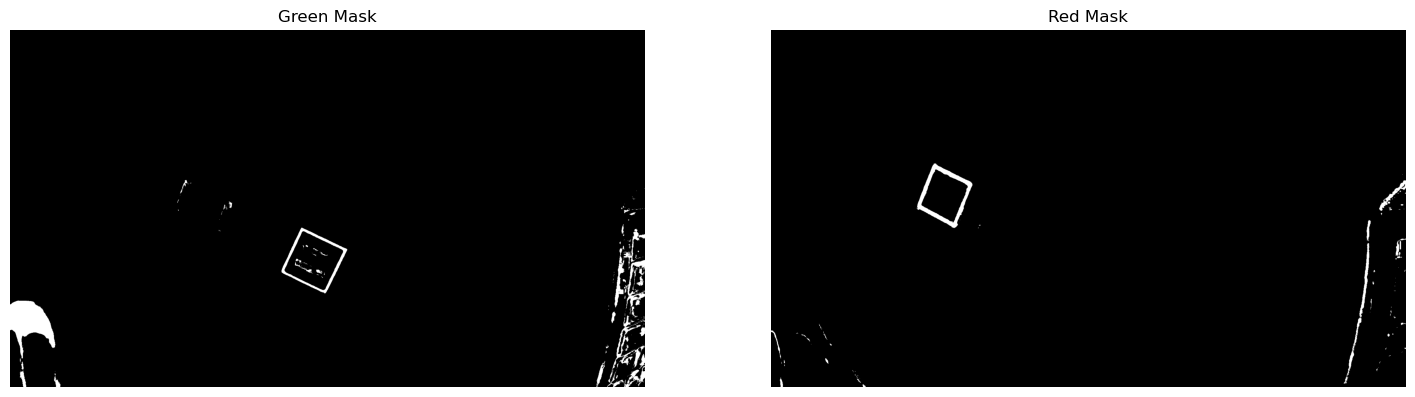

In [301]:
# Apply the hsv mask to the image. 
# Best configuration for detecting red squares in the image mix_G1_64.jpg
# H = 120, S = 20, V = 0, H1 = 179, S1 = 255, V1 = 255
# Best configuration for detecting green squares in the image mix_G1_64.jpg
# H = 50, S = 40, V = 0, H1 = 110, S1 = 255, V1 = 130

lower_red = np.array([120, 20, 0])
upper_red = np.array([179, 255, 255])
lower_green = np.array([50, 40, 0])
upper_green = np.array([110, 255, 160])
mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Display the masks
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(mask_green, cmap='gray') ; plt.title('Green Mask') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(mask_red, cmap='gray') ; plt.title('Red Mask') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

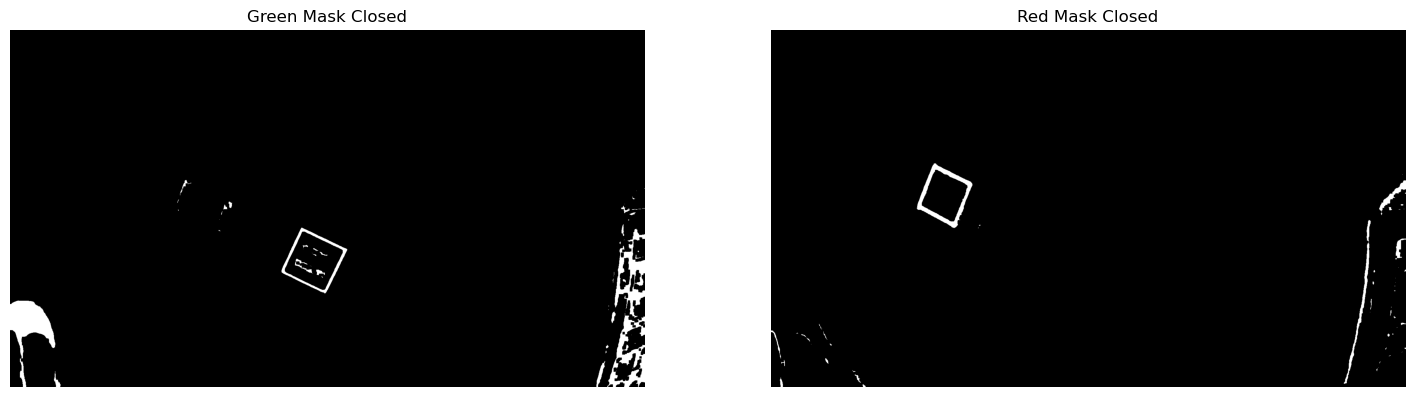

In [302]:
# Apply apperture and close the mask
kernel = np.ones((7,7), np.uint8)   
mask_red_closed = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_green_closed = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)

# Display the closed masks
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(mask_green_closed, cmap='gray') ; plt.title('Green Mask Closed') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(mask_red_closed, cmap='gray') ; plt.title('Red Mask Closed') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

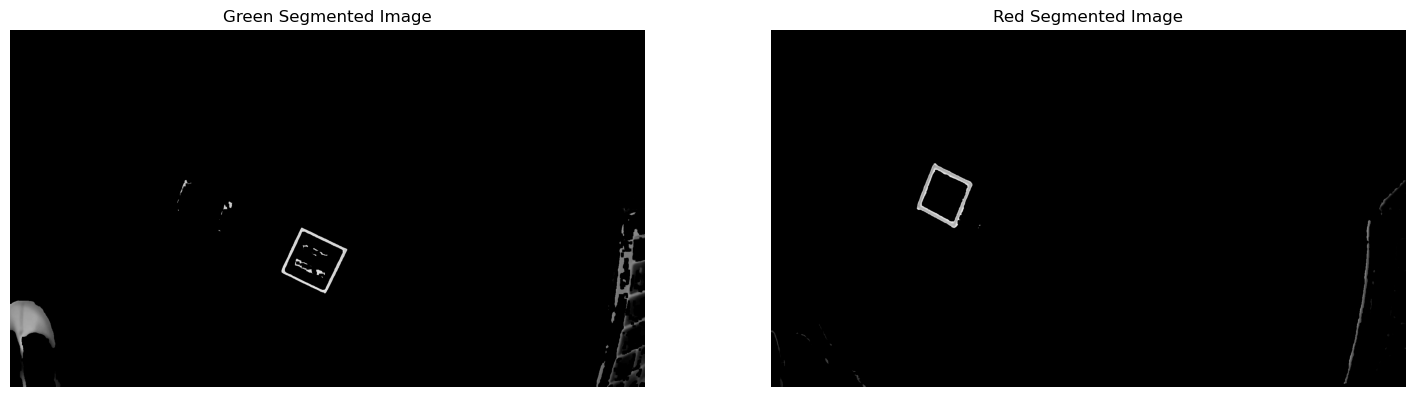

In [303]:
# Aplicar las máscaras a la imagen en escala de grises
segmented_red = cv2.bitwise_and(gray, gray, mask=mask_red_closed)
segmented_green = cv2.bitwise_and(gray, gray, mask=mask_green_closed)

# Display the segmented images
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(segmented_green, cmap='gray') ; plt.title('Green Segmented Image') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(segmented_red, cmap='gray') ; plt.title('Red Segmented Image') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

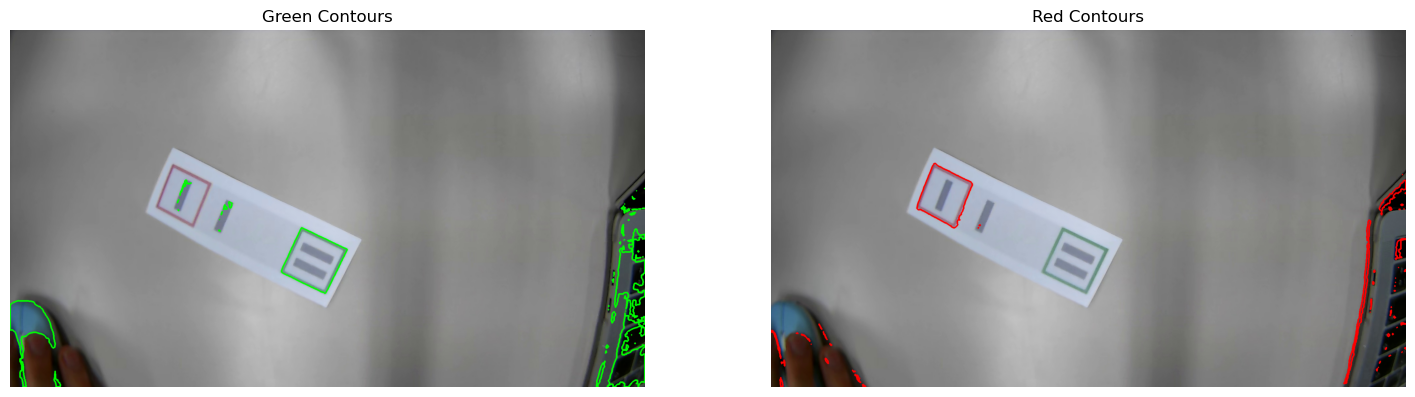

In [304]:
# Find countours using canny
## Find the contours in the segmented images using the Canny edge detector.

contours_green, hierarchy = cv2.findContours(mask_green_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, hierarchy = cv2.findContours(mask_red_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the image
contours_green_canny = np.copy(image)
contours_red_canny = np.copy(image)

cv2.drawContours(contours_green_canny, contours_green, -1, (0, 255, 0), 3)
cv2.drawContours(contours_red_canny, contours_red, -1, (255, 0, 0), 3)

# Display the images with the contours
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(contours_green_canny) ; plt.title('Green Contours') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(contours_red_canny) ; plt.title('Red Contours') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

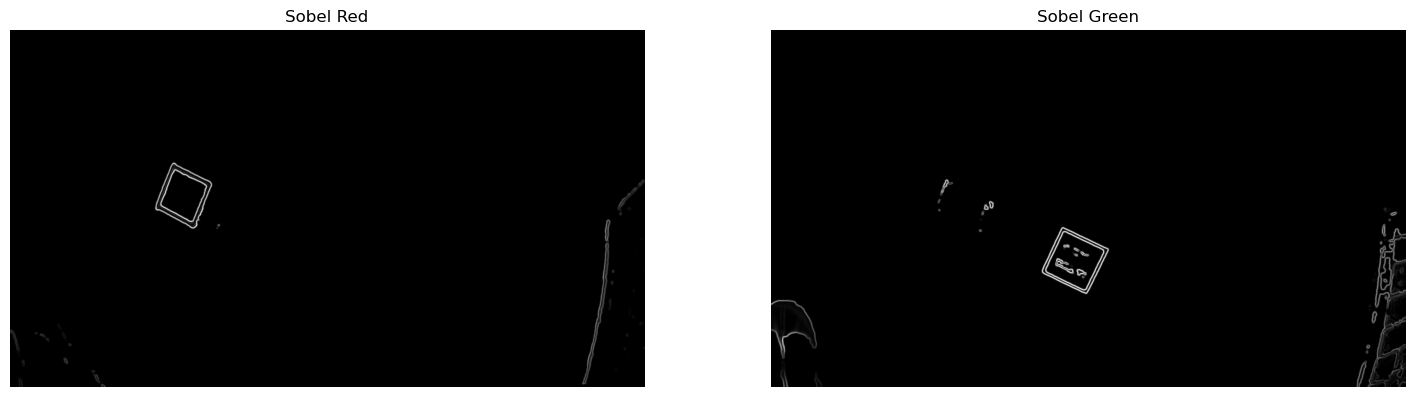

In [305]:
# Sobel filter the image.
## Apply the Sobel filter to the image. The Sobel filter is used to find the edges in an image.
img_green_sobel_x = cv2.Sobel(segmented_green, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_green_sobel_y = cv2.Sobel(segmented_green, cv2.CV_64F, 0, 1, ksize=11) 
img_green_sobel = np.sqrt(img_green_sobel_x**2 + img_green_sobel_y**2)
img_green_sobel = cv2.normalize(img_green_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

img_red_sobel_x = cv2.Sobel(segmented_red, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_red_sobel_y = cv2.Sobel(segmented_red, cv2.CV_64F, 0, 1, ksize=11)
img_red_sobel = np.sqrt(img_red_sobel_x**2 + img_red_sobel_y**2)
img_red_sobel = cv2.normalize(img_red_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# Display the sobel image
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(img_red_sobel, cmap='gray'), plt.title('Sobel Red') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(img_green_sobel, cmap='gray'), plt.title('Sobel Green') ; plt.axis('off')

Number of contours green found =  45
Number of contours red found =  55
Number of filtered green contours =  2
Number of filtered red contours =  1


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

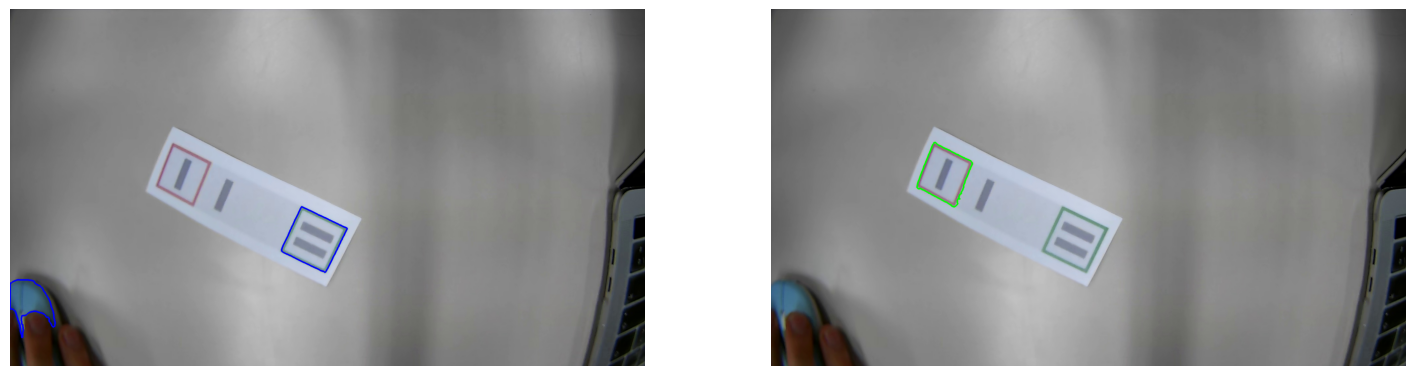

In [306]:
# Find the contours in the segmented images
green_contours, green_heirarchy = cv2.findContours(img_green_sobel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
red_contours, red_heirarchy = cv2.findContours(img_red_sobel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Number of contours
print('Number of contours green found = ', len(contours_green))
print('Number of contours red found = ', len(contours_red))

# Filter the contours by aspect ratio and area
filtered_green_contours= []
for contour in contours_green:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    area = cv2.contourArea(contour)
    if area > 2000 and aspect_ratio > 0.7 and aspect_ratio < 1.3:
        filtered_green_contours.append(contour)

filtered_red_contours = []
for contour in contours_red:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    area = cv2.contourArea(contour)
    if area > 2000 and aspect_ratio > 0.7 and aspect_ratio < 1.3:
        filtered_red_contours.append(contour)

# Number of filtered contours
print('Number of filtered green contours = ', len(filtered_green_contours))
print('Number of filtered red contours = ', len(filtered_red_contours))

## Prin the filtered contours
image_filtered_green_contours = np.copy(image)
image_filtered_red_contours = np.copy(image)
cv2.drawContours(image_filtered_green_contours, filtered_green_contours, -1, (0, 0, 255), 3)
cv2.drawContours(image_filtered_red_contours, filtered_red_contours, -1, (0, 255, 0), 3)

# Display the image with the filtered contours
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(image_filtered_green_contours) ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(image_filtered_red_contours) ; plt.axis('off')


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

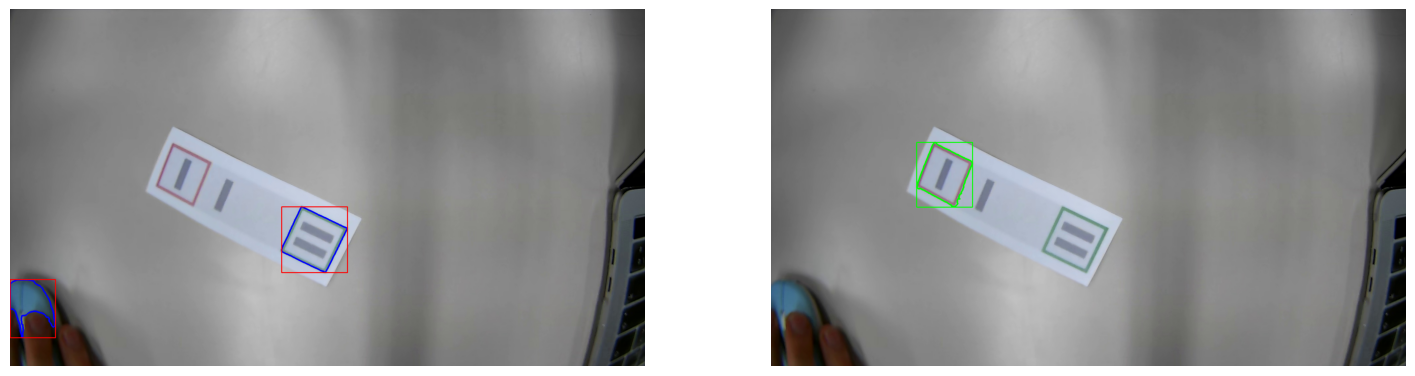

In [307]:
## Find the bounding boxes of the filtered contours
contours_filtered_green = []
for contour in filtered_green_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_filtered_green_contours, (x, y), (x+w, y+h), (255, 0, 0), 2)
    contours_filtered_green.append(contour)

contours_filtered_red = []
for contour in filtered_red_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_filtered_red_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)
    contours_filtered_red.append(contour)

# Display the image with the bounding boxes
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(image_filtered_green_contours) ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(image_filtered_red_contours) ; plt.axis('off')

Center =  (59, 881) Height =  176 Width =  137 Mean =  156.5 Angle =  71.56504821777344
Center =  (918, 697) Height =  199 Width =  199 Mean =  199.0 Angle =  25.559965133666992
Center =  (524, 500) Height =  196 Width =  169 Mean =  182.5 Angle =  26.56505012512207


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

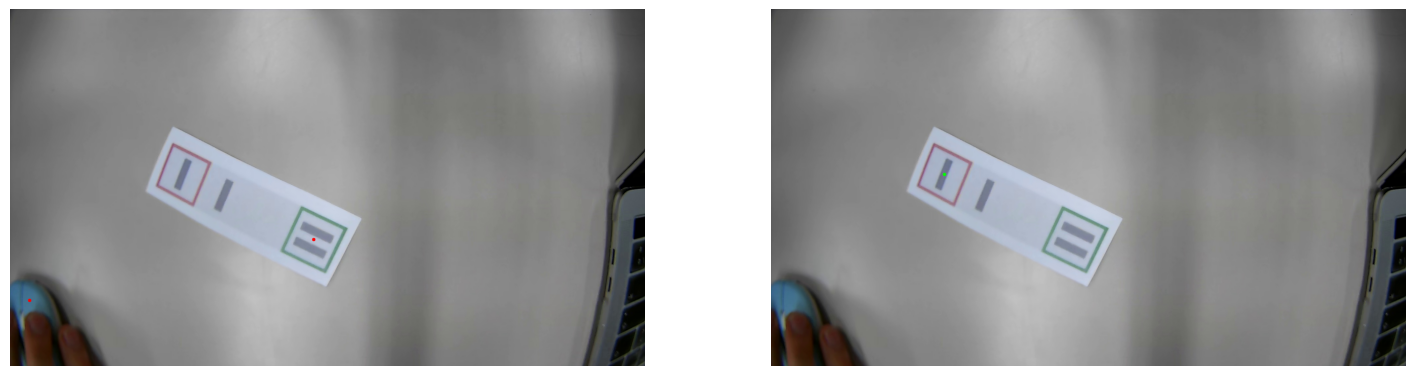

In [308]:
# Extract the center and the mean of the height and width of the contours
centers_green = [] ; centers_red = []
angles_green = [] ; angles_red = []
heights_green = [] ; heights_red = []
widths_green = [] ; widths_red = []
mean_green = [] ; mean_red = []
for contour in filtered_green_contours:
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    centers_green.append((cX, cY))
    # Get the inclination angle of the contour
    angle = cv2.minAreaRect(contour)[2]
    angles_green.append(angle)
    x, y, w, h = cv2.boundingRect(contour)
    heights_green.append(h)
    widths_green.append(w)
    # Mean between the height and the width
    mean_green.append((h + w) / 2)
    print('Center = ', (cX, cY), 'Height = ', h, 'Width = ', w, 'Mean = ', mean_green[-1], 'Angle = ', angle)  

for contour in filtered_red_contours:
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    centers_red.append((cX, cY))
    # Get the inclination angle of the contour
    angle = cv2.minAreaRect(contour)[2]
    angles_red.append(angle)
    x, y, w, h = cv2.boundingRect(contour)
    heights_red.append(h)
    widths_red.append(w)
    # Mean between the height and the width
    mean_red.append((h + w) / 2)
    print('Center = ', (cX, cY), 'Height = ', h, 'Width = ', w, 'Mean = ', mean_red[-1], 'Angle = ', angle)

# Display the centers
centers_green_image = np.copy(image)
for center in centers_green:
    cv2.circle(centers_green_image, center, 5, (255, 0, 0), -1)

centers_red_image = np.copy(image)
for center in centers_red:
    cv2.circle(centers_red_image, center, 5, (0, 255, 0), -1)

plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(centers_green_image) ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(centers_red_image) ; plt.axis('off')

Number of matches =  1
Matches =  [(1, 0)]


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

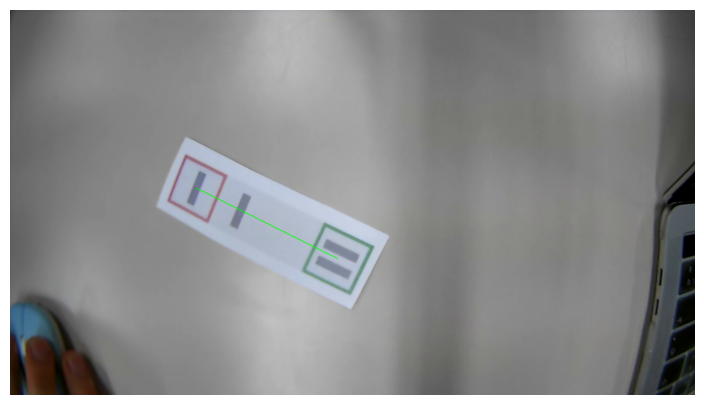

In [309]:
# match the green and red squares that are similar in angle and size
matches = []
for i in range(len(filtered_green_contours)):
    for j in range(len(filtered_red_contours)):
        if abs(angles_green[i] - angles_red[j]) < 10  and abs(mean_green[i] - mean_red[j]) < 50:
            matches.append((i, j))

# Display the matches
print('Number of matches = ', len(matches))
print('Matches = ', matches)

# Draw lines between the matched contours
image_matches = np.copy(image)
real_matches = []
for match in matches:
    i, j = match
    if np.linalg.norm(np.array(centers_green[i]) - np.array(centers_red[j])) < 3 * heights_green[i]:
        cv2.line(image_matches, centers_green[i], centers_red[j], (0, 255, 0), 2)
        real_matches.append((i, j))
    # cv2.line(image_matches, centers_green[i], centers_red[j], (0, 255, 0), 2)

# Display the image with the matches
plt.figure(figsize=[18, 5])
plt.imshow(image_matches) ; plt.axis('off')


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

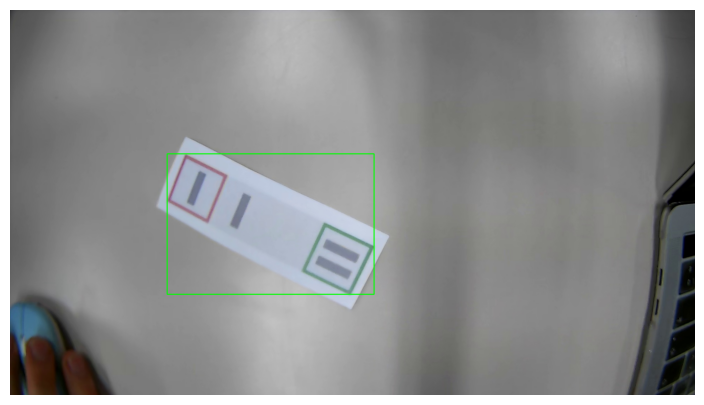

In [310]:
# Get the bounding boxes that join the matched contours
joined_contours = []
for match in real_matches:
    i, j = match
    x1, y1, w1, h1 = cv2.boundingRect(filtered_green_contours[i])
    x2, y2, w2, h2 = cv2.boundingRect(filtered_red_contours[j])
    x = min(x1, x2)
    y = min(y1, y2)
    w = max(x1 + w1, x2 + w2) - x
    h = max(y1 + h1, y2 + h2) - y
    joined_contours.append((x, y, w, h))

# Draw the bounding boxes that join the matched contours
image_joined_contours = np.copy(image)
for contour in joined_contours:
    cv2.rectangle(image_joined_contours, (contour[0], contour[1]), (contour[0] + contour[2], contour[1] + contour[3]), (0, 255, 0), 2)

# Display the image with the bounding boxes
plt.figure(figsize=[18, 5])
plt.imshow(image_joined_contours) ; plt.axis('off')

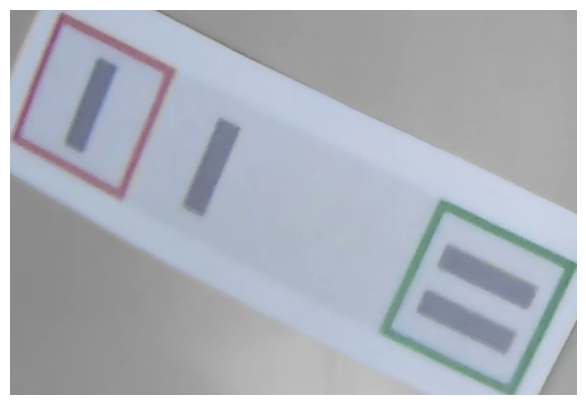

In [311]:
# Cut the bounding boxes from the original image
cropped_images = []
for i in range(len(joined_contours)):
    x, y, w, h = joined_contours[i]
    cropped_image = image[y:y+h, x:x+w]
    cropped_images.append(cropped_image)
    
# Display the cropped images
plt.figure(figsize=[18, 5])
for i in range(len(cropped_images)):
    plt.subplot(1, len(cropped_images), i+1) ; plt.imshow(cropped_images[i]) ; plt.axis('off')
